# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd

# File path of the data set
file_path = '/content/drive/My Drive/foodhub_order.csv'

df = pd.read_csv(file_path)

In [9]:
# To view the first 5 rows
df.head(5)


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here

In [10]:
no_of_rows, no_of_cols = df.shape

print("Number of rows:", no_of_rows)
print("Number of columns:", no_of_cols)

Number of rows: 1898
Number of columns: 9


#### Observations:


The dataset has 1898 rows, representing a moderate number of orders placed through FoodHub. With 9 columns, we have a variety of data points for each order, such as customer ID, restaurant name, and delivery time. This combination of size and features provides a good foundation for analyzing customer preferences and operational efficiency.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [11]:
# Metadata info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


The FoodHub dataset contains a mix of numerical (int64, float64) and categorical (object) data types, representing various aspects of customer orders, such as order details, restaurant information, and delivery times. This variety of data types enables a comprehensive analysis of different factors influencing the food ordering and delivery process.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [22]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [18]:
# Statistical summary
print(df.describe())

# Minimum, average, and maximum food preparation time
min_prep_time = df['food_preparation_time'].min()
avg_prep_time = df['food_preparation_time'].mean()
max_prep_time = df['food_preparation_time'].max()

# Round off avg_prep_time to two decimal points
rounded_avg_prep_time = round(avg_prep_time, 2)

print("\nFood Preparation Time:")
print("Minimum:", min_prep_time, "mins")
print("Average:", rounded_avg_prep_time, "mins")
print("Maximum:", max_prep_time, "mins")

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  

Food Preparation Time:
Minimum: 20 mins
Average: 27.37 mins
Maximum: 35

#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [23]:
# Number of orders that were not rated
not_given_count = df[df['rating'] == 'Not given'].shape[0]

print("Number of orders not rated:", not_given_count)

Number of orders not rated: 736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

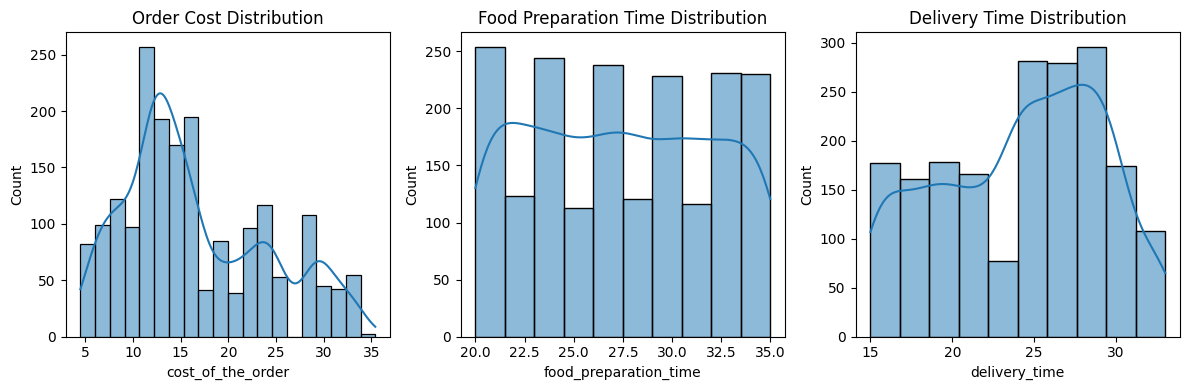

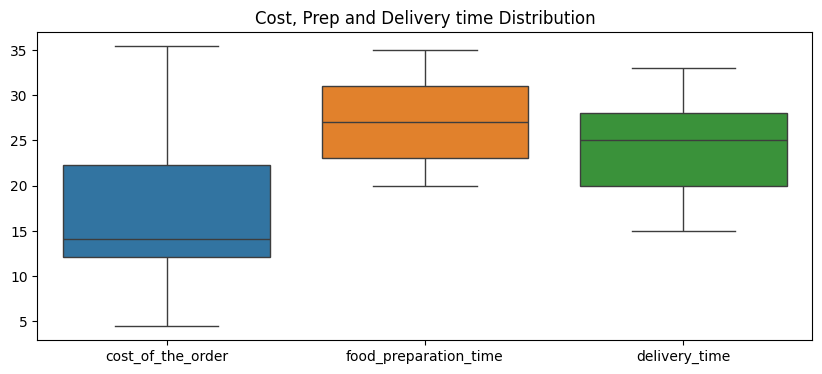

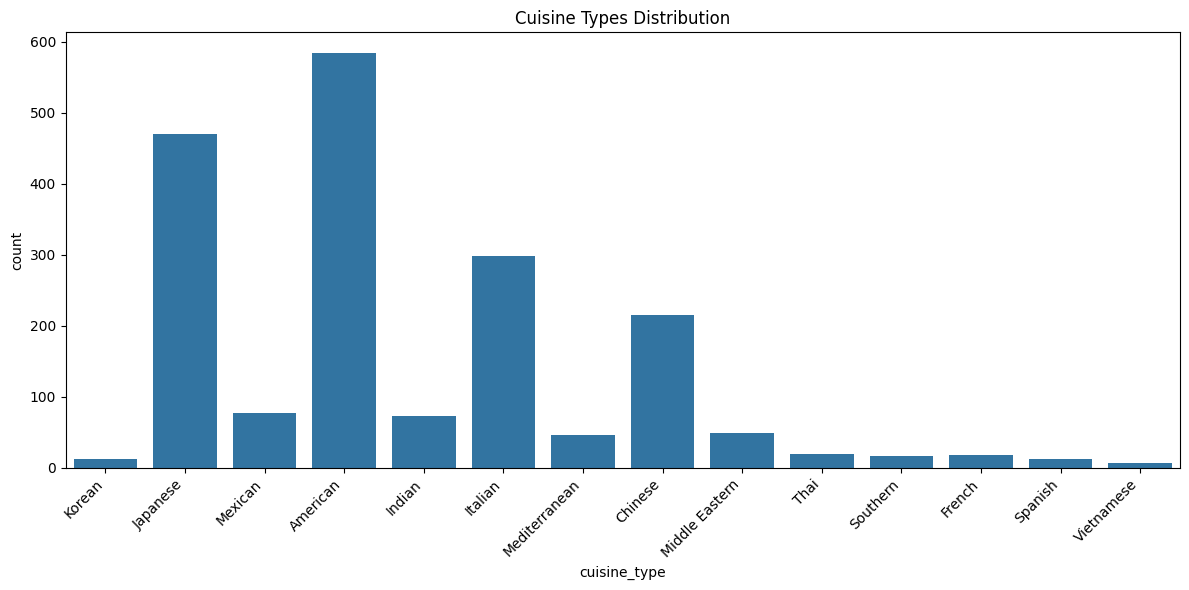

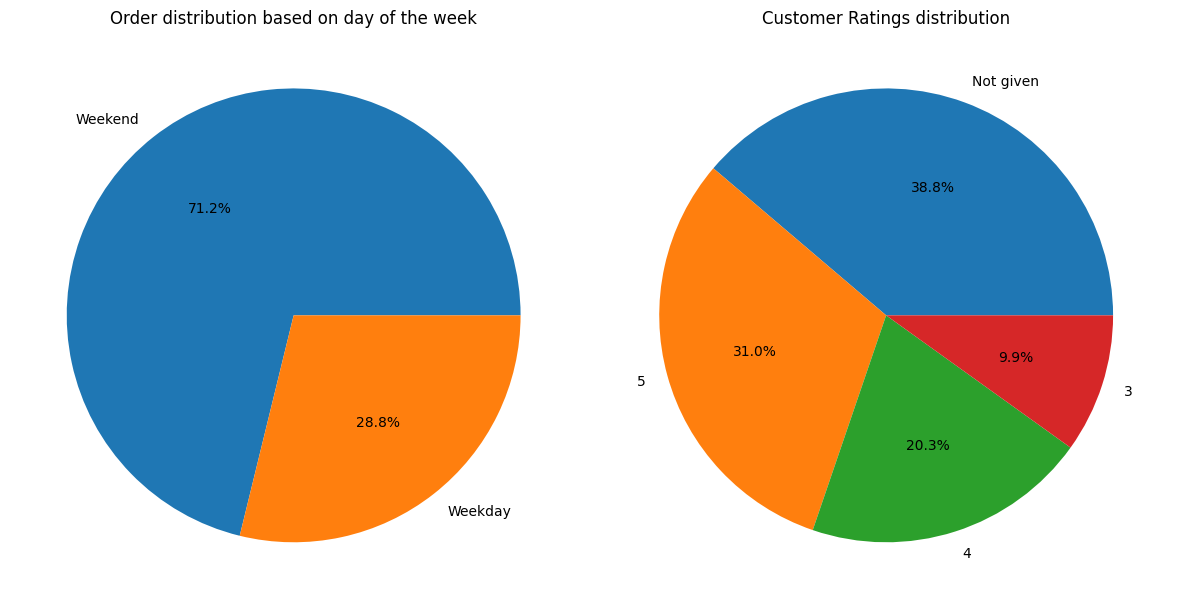

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Numerical Variables ---

# Histograms
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['cost_of_the_order'], bins=20, kde=True)
plt.title('Order Cost Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['food_preparation_time'], bins=10, kde=True)
plt.title('Food Preparation Time Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['delivery_time'], bins=10, kde=True)
plt.title('Delivery Time Distribution')

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.title('Cost, Prep and Delivery time Distribution')
plt.show()


# --- Categorical Variables ---

# Countplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
sns.countplot(x=df['cuisine_type'])
plt.title('Cuisine Types Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pie Charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
day_counts = df['day_of_the_week'].value_counts()
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%')
plt.title('Order distribution based on day of the week')

plt.subplot(1, 2, 2)
rating_counts = df['rating'].value_counts()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Customer Ratings distribution')

plt.tight_layout()
plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [41]:
# Top 5 restaurants ordered from
most_ordered = df['restaurant_name'].value_counts().head(5)
print("The top 5 restaurants in terms of no of orders are:")
print(most_ordered)

The top 5 restaurants in terms of no of orders are:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
Shake Shack is the most popular restaurant with 219 orders, followed by The Meatball Shop (132 orders) and Blue Ribbon Sushi (119 orders). Blue Ribbon Fried Chicken and Parm are also among the top 5, with 96 and 68 orders respectively. These five restaurants receive significantly more orders compared to other restaurants in the dataset.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [42]:
popular_cuisine = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()
print("The most popular cuisine on weekends is:", popular_cuisine)

The most popular cuisine on weekends is: American


#### Observations:
Most popular cuisine during the weekends in american

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [48]:
orders_greater_than_20 = df[df['cost_of_the_order']>20].shape[0]
total_orders = df.shape[0]
per_over_20 = (orders_greater_than_20 / total_orders) * 100
print(f"The percenatge of order greater than 20 is: {per_over_20:.2f}%")

The percenatge of order greater than 20 is: 29.24%


#### Observations:

Approximately 30% of the orders are more than 20$


### **Question 10**: What is the mean order delivery time? [1 mark]

In [50]:
average_delivery_time = round(df['delivery_time'].mean())
print(f"the average delivery time is:{average_delivery_time}mins")

the average delivery time is:24mins


#### Observations:
On an average it takes approximately 24mins for an order to be delivered

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [51]:
top_customers = df['customer_id'].value_counts().head(3)
print("The top 3 most frequent customers are:")
print(top_customers)

The top 3 most frequent customers are:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


####The below are the top 3 customer IDs with most orders:
cust_Id|Orders

52832|13

47440|10

83287|9

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


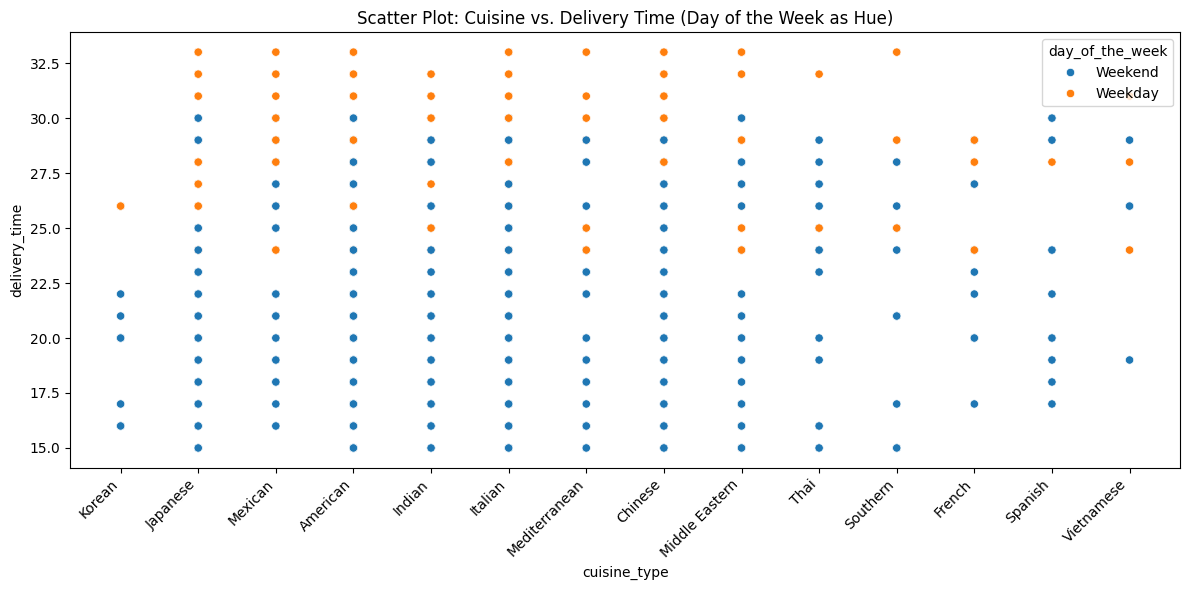

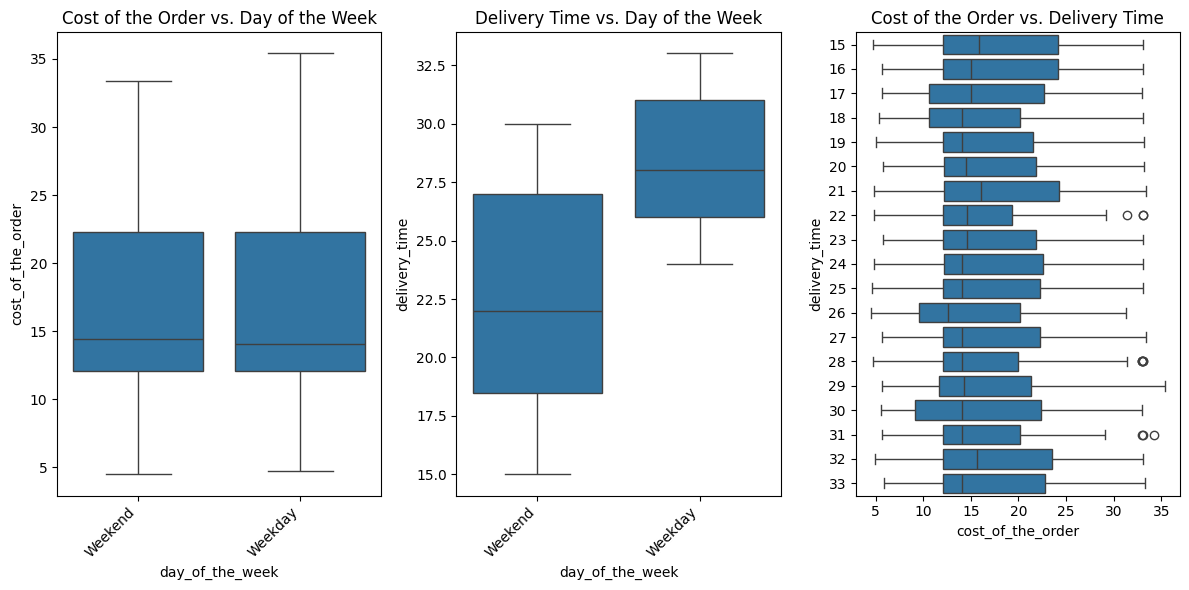

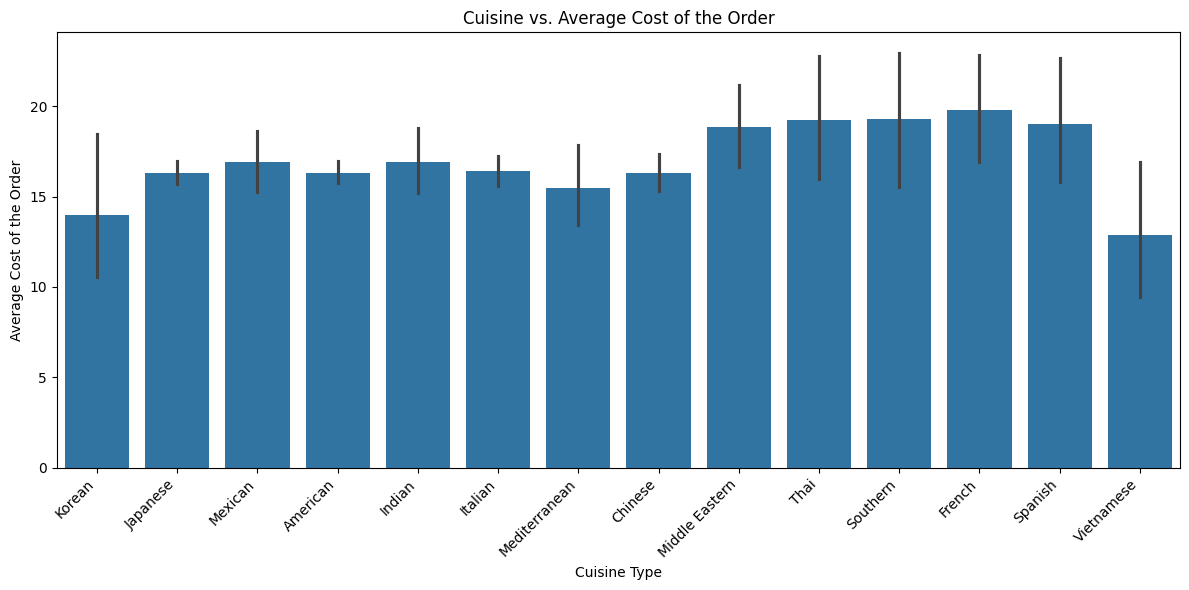

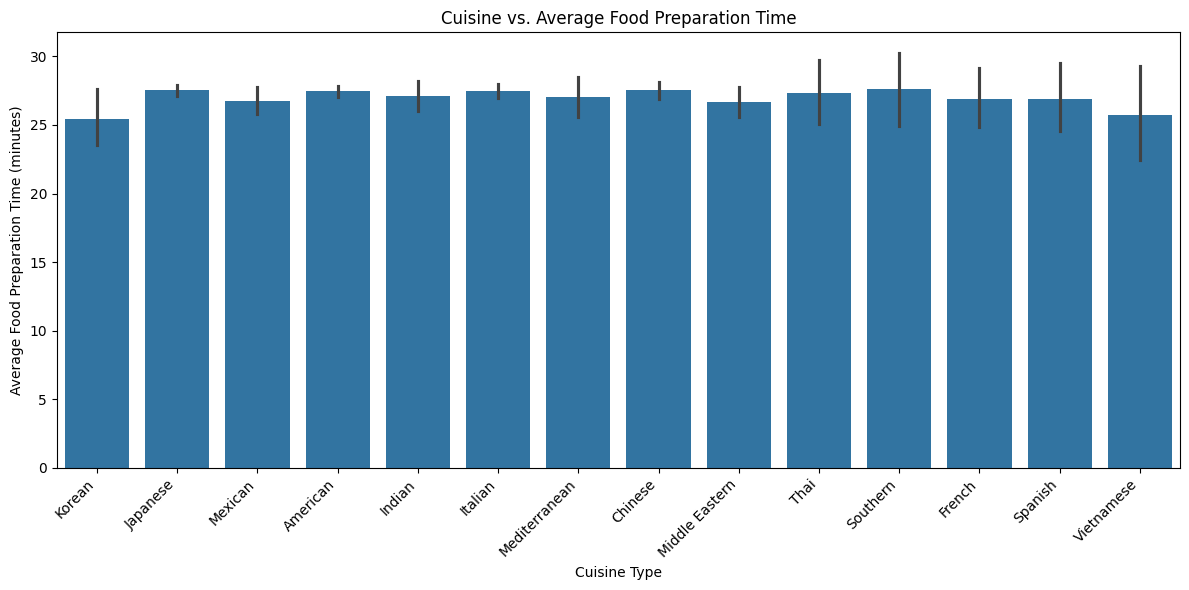

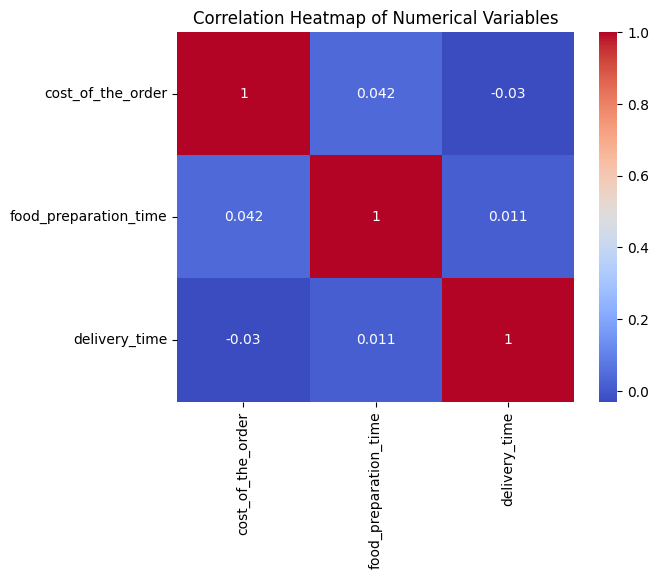

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relationship between numerical variables
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='cuisine_type', y='delivery_time', hue='day_of_the_week', data=df)
plt.title('Scatter Plot: Cuisine vs. Delivery Time (Day of the Week as Hue)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.title('Cost of the Order vs. Day of the Week')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time vs. Day of the Week')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.boxplot(x='cost_of_the_order', y='delivery_time', data=df, orient='h')
plt.title('Cost of the Order vs. Delivery Time')

plt.tight_layout()
plt.show()

# Bar graphs
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('Cuisine vs. Average Cost of the Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost of the Order')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.title('Cuisine vs. Average Food Preparation Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Food Preparation Time (minutes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Heatmap
correlation_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [74]:
# Convert 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group data by restaurant and calculate rating statistics
restaurant_ratings = df.groupby('Restaurant')['rating'].agg(['count', 'mean'])

# Filter restaurants with more than 50 and avg 4 ratings
promotional_restaurants = restaurant_ratings[
    (restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)
]

#Display
print("Restaurants eligible for promotion:")
print(promotional_restaurants)

Restaurants eligible for promotion:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [84]:
revenue_over_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25
revenue_over_5 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15
total_revenue = round(revenue_over_20 + revenue_over_5,2)

print(f"Total revenue generated by the company: ${total_revenue}")

Total revenue generated by the company: $6166.3


#### Observations:
The company generates a total revenue of approximately $6166


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [83]:
revenue_over_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25
revenue_over_5 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15
total_revenue = round(revenue_over_20 + revenue_over_5,2)

print(f"Total revenue generated by the company: ${total_revenue}")

Total revenue generated by the company: $6166.3


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [88]:
# Calculate mean delivery time for weekdays
weekday_delivery_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# Calculate mean delivery time for weekends
weekend_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Print the results
print("Mean delivery time on weekdays:", round(weekday_delivery_time))
print("Mean delivery time on weekends:", round(weekend_delivery_time))

# Calculate and print the difference
difference = round(weekday_delivery_time) - round(weekend_delivery_time)
print("Difference in mean delivery time (Weekend - Weekday):", difference)

Mean delivery time on weekdays: 28
Mean delivery time on weekends: 22
Difference in mean delivery time (Weekend - Weekday): 6


#### Observations:

The average delivery time on a weekday is around 28mins and during the weekends its down by around 6mins, which is approx. 22mins. Delivery times are shorter during the weekends


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---